<a href="https://colab.research.google.com/github/AndonyAbdala/PRUEBA/blob/master/numba_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numba básico
---
## Introducción a Inteligencia Artificial y Supercómputo 
---

In [ ]:
!pip install perfplot
import numba
import numpy as np
import perfplot
from numba import jit, njit

Numba usa **decoradores** de Python para transformar las funciones en funciones que se compilan. El decorador de Numba  es `@jit`, que crea una función normal para la ejecución en la CPU.

La función es compilada y transformada a code máquina una vez que está es llamada por primera vez.

Numba funciona mejor en operaciones con matrices NumPy. Aquí hay un ejemplo:

In [ ]:
@jit(nopython=True)
def numba_function(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

La opción `nopython=True` hace que la función se compile completamente (las llamadas del intérprete de Python se eliminen por completo), de lo contrario, se genera una excepción.

In [ ]:
x = np.arange(100).reshape(10, 10)
numba_function(x)

array([[  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.],
       [ 19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.],
       [ 39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.],
       [ 49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.],
       [ 59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.],
       [ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.],
       [ 79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.],
       [ 89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.],
       [ 99., 100., 101., 102., 103., 104., 105., 106., 107., 108.]])

La primera vez que se llamó a la función, está fue copilada y ejecutada. Si se llama nuevamente, ya no se generará el proceso de compilación.

In [ ]:
numba_function(2*x)

array([[  9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.],
       [ 29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.],
       [ 49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.],
       [ 69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.],
       [ 89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107.],
       [109., 111., 113., 115., 117., 119., 121., 123., 125., 127.],
       [129., 131., 133., 135., 137., 139., 141., 143., 145., 147.],
       [149., 151., 153., 155., 157., 159., 161., 163., 165., 167.],
       [169., 171., 173., 175., 177., 179., 181., 183., 185., 187.],
       [189., 191., 193., 195., 197., 199., 201., 203., 205., 207.]])

Se realiza una medición del tiempo de ejecución a través de *timeit* para compara el tiempo que tarda en termina una tarea con y sin Numba.

In [ ]:
%timeit numba_function.py_func(x)
%timeit numba_function(x)

The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.9 µs per loop
The slowest run took 21.31 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 855 ns per loop


Una razón por la cual hay tanta diferencia es que los loops de Numba son muy rápidos en comparación de un loop común de Python. Sin embargo, la función `numba_function` puede ser representada con operaciones de Numpy como a continuación.

In [ ]:
def numpy_function(a):
    return a + np.tanh(np.diagonal(a)).sum()

In [ ]:
%timeit numpy_function(x)
%timeit numba_function(x)

The slowest run took 19.17 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.83 µs per loop
The slowest run took 46.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 848 ns per loop


In [ ]:
@jit(nopython=True)
def distance(X):
    M = X.shape[0]
    N = X.shape[1]
    D = np.empty((M, M), dtype=np.float32)
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = np.sqrt(d)
    return D

def numpy_distance(X):
    return np.sqrt(((X[:, None, :] - X) ** 2).sum(-1))

In [ ]:
A = np.random.random((1000, 10)).astype(np.float32)

In [ ]:
%timeit distance.py_func(A)
%timeit numpy_distance(A)
%timeit distance(A)

1 loop, best of 3: 11.3 s per loop
10 loops, best of 3: 37.6 ms per loop
The slowest run took 12.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 14.6 ms per loop


100%|██████████| 4/4 [00:09<00:00,  2.26s/it]


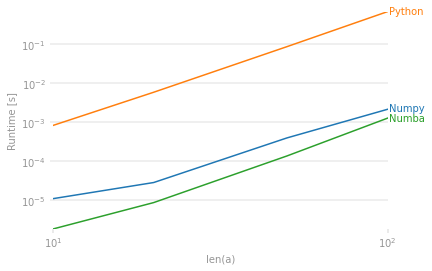

In [ ]:
perfplot.show(
    setup=lambda n: np.ones((n, n)),
    kernels=[
        lambda a: numpy_distance(a),
        lambda a: distance.py_func(a),
        lambda a: distance(a)
    ],
    labels=["Numpy", "Python", "Numba"],
    n_range=[10, 20, 50, 100],
    xlabel="len(a)",
    logx=True,
    logy=True,
)

Se observa que aún con las funciones de Numpy este sigue siendo más lento que Numba.

A pesar de esto, se puede combinar Numpy y Numba, pero no todas las operaciones están [soportadas](http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html).

## Paralelización
___

Numba soporta varios enfoques para paralelizar:

- Paralelización automática de operaciones con matrices.
- Subprocesamiento múltiple explícito de bucles con `prange()`.

Las operaciones con matrices en NumPy tienen una cantidad significativa de paralelismo implícito. Numba puede identificar este paralelismo y distribuirlo automáticamente en varios subprocesos. Todo lo que se tiene que hacer es habilitar el parámetro de paralelización con `parallel=True` en el decorador:

### Paralelización automática

In [ ]:
SQRT_2PI = np.sqrt(2 * np.pi)

@jit(nopython=True, parallel=True)
def gaussians(x, means, widths):
    n = means.shape[0]
    result = np.exp( -0.5 * ((x - means) / widths)**2 ) / widths
    return result / SQRT_2PI / n

In [ ]:
means = np.random.uniform(-1, 1, size=1000000)
widths = np.random.uniform(0.1, 0.3, size=1000000)

gaussians(0.4, means, widths)

array([1.30353947e-24, 1.11946737e-10, 6.28150530e-10, ...,
       7.54829176e-23, 1.56101333e-06, 7.73839720e-07])

Comparemos el desempeño con paralelización, sin paralelización y Numpy puro.

In [ ]:
nothread = jit(nopython=True)(gaussians.py_func)
print("Python")
%timeit gaussians.py_func(0.4, means, widths)
print("No paralelo con Numba")
%timeit nothread(0.4, means, widths)
print("Paralelizado con Numba")
%timeit gaussians(0.4, means, widths)

Python
10 loops, best of 3: 26.5 ms per loop
No paralelo con Numba
The slowest run took 11.88 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 20.5 ms per loop
Paralelizado con Numba
100 loops, best of 3: 16.1 ms per loop


### Paralelización con `prange()`

El uso de `prange()` en un bucle `for` indica a Numba que este es un bucle donde cada iteración es independiente de la otra y puede ejecutarse en paralelo.

Por ejemplo, podríamos querer ejecutar muchas pruebas de Monte Carlo seguidas.

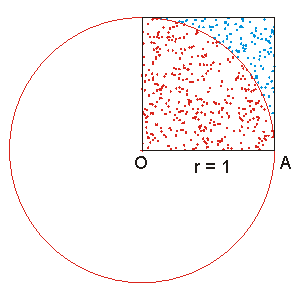

In [ ]:
import random

@jit(nopython=True)
def monte_carlo_serial(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples


@jit(nopython=True, parallel=True)
def monte_carlo_parallel(nsamples):
    acc = 0
    for i in numba.prange(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [ ]:
print(monte_carlo_parallel(10))
print(monte_carlo_parallel(100))
print(monte_carlo_parallel(1000))
print(monte_carlo_parallel(10000))

3.6
3.36
3.148
3.1508


In [ ]:
%timeit monte_carlo_serial(1000000000)

%timeit monte_carlo_parallel(1000000000)

1 loop, best of 3: 13.3 s per loop
1 loop, best of 3: 12 s per loop


### Diccionarios

Algunas características de Python NO están soportadas en Numba, por ejemplo, el uso de diccionarios (`dic`) inicializados.

In [ ]:
@jit(nopython=True)
def no_init_dict():
    d = dict()
    d[0] = 1
    return d

@jit(nopython=True)
def init_dict():
    d = dict({0:1})
    return d

In [ ]:
no_d = no_init_dict()
print(no_d)

{0: 1}


In [ ]:
# d = init_dict()
d = init_dict.py_func()
print(d)

{0: 1}
